<a href="https://colab.research.google.com/github/aayushchourasia123/Hackathon-Project/blob/main/UPI%20fraud%20detection%20using%20gradientboostingclassifier%20/Upi_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/UPI Latest data.csv')

In [ ]:
df.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00000001,23/10/23,4:36:16 AM,8bbd74bb-c7ab-4d9a-8cae-29bf6777bba4,bbd15462-34e8-4d84-b38d-c0a48ca151a5,35c93295-5585-40ec-9ba8-2ff3a3ed9246,Purchase,ICICI UPI,Mango,Uttarakhand,72.74.226.105,Pending,Windows,2,Travel bookings,Online,68.25,24,4.55,0
1,T00000002,31/05/23,4:36:16 AM,1f0efdbe-f18c-4668-aba3-b7674d5e0100,d93133d4-b039-4d19-8060-b8b3d8de4c0d,8e40bf94-19f0-4a27-a154-05ebfd14c5aa,Bank Transfer,HDFC,Gorakhpur,Himachal Pradesh,111.214.109.143,Pending,Windows,2,Financial services and Taxes,Mobile,-57.75,17,39.68,0
2,T00000003,19/01/24,4:36:16 AM,fb552d01-e704-440e-b29b-6c152ed37998,8d610bff-9b2b-41d5-86f7-df78c5aee909,b8f5781f-2b91-4c41-a1bf-25d69ba32ec1,Bill Payment,CRED,Khammam,Andhra Pradesh,111.0.26.121,Pending,Android,3,Financial services and Taxes,In-store,-46.95,20,26.89,0
3,T00000004,18/09/23,5:07:24 AM,43001ee3-c6ca-4033-89e9-9502b3072bb7,63d01a4c-3e68-49c6-a54c-e7ea14cfba44,725a2ef7-5e4b-4a20-b486-a647d9005cdf,Other,HDFC,Nanded,Odisha,166.88.212.66,Completed,iOS,0,Utilities,Mobile,-96.64,18,17.25,0
4,T00000005,18/08/23,12:16:28 PM,df1c84af-fa42-4ce7-99ea-5a9fd657361e,4c2613de-9129-4ab2-a2b4-dd6e008a487d,10dfb43d-6fb5-4e9f-9159-ffaf691b67c5,Other,HDFC,Machilipatnam,West Bengal,20.34.147.155,Failed,Windows,2,Other,Online,36.14,5,35.72,0


In [ ]:
df.shape

(50000, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   Date                          50000 non-null  object 
 2   Time                          50000 non-null  object 
 3   Merchant_ID                   50000 non-null  object 
 4   Customer_ID                   50000 non-null  object 
 5   Device_ID                     50000 non-null  object 
 6   Transaction_Type              50000 non-null  object 
 7   Payment_Gateway               50000 non-null  object 
 8   Transaction_City              50000 non-null  object 
 9   Transaction_State             50000 non-null  object 
 10  IP_Address                    50000 non-null  object 
 11  Transaction_Status            50000 non-null  object 
 12  Device_OS                     50000 non-null  object 
 13  T

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Frequency,50000.0,3.789100,7.165309,0.0,1.00,2.000,3.0000,90.00
Transaction_Amount_Deviation,50000.0,0.036824,57.766852,-100.0,-49.94,-0.245,49.9325,99.99
Days_Since_Last_Transaction,50000.0,15.012060,8.361009,1.0,8.00,15.000,22.0000,29.00
amount,50000.0,39.886908,130.702980,0.0,13.81,26.970,42.8700,7432.48
fraud,50000.0,0.015480,0.123453,0.0,0.00,0.000,0.0000,1.00


## DATA PREPARATION

In [ ]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Check missing values
df.isnull().sum()

,0
Transaction_ID,0
Date,0
Time,0
Merchant_ID,0
Customer_ID,0
Device_ID,0
Transaction_Type,0
Payment_Gateway,0
Transaction_City,0
Transaction_State,0


In [ ]:
# Check unique values
df.nunique()

,0
Transaction_ID,50000
Date,367
Time,29624
Merchant_ID,50000
Customer_ID,50000
Device_ID,50000
Transaction_Type,7
Payment_Gateway,9
Transaction_City,316
Transaction_State,28


In [ ]:
# Droping unique columns as they do not add any value to the analysis
df.drop(columns=['Transaction_ID', 'Merchant_ID', 'Customer_ID', 'Device_ID','IP_Address'], axis=1, inplace=True)

In [ ]:
df.head(2)

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,23/10/23,4:36:16 AM,Purchase,ICICI UPI,Mango,Uttarakhand,Pending,Windows,2,Travel bookings,Online,68.25,24,4.55,0
1,31/05/23,4:36:16 AM,Bank Transfer,HDFC,Gorakhpur,Himachal Pradesh,Pending,Windows,2,Financial services and Taxes,Mobile,-57.75,17,39.68,0


## Data Cleaning and Feature Engineering

In [ ]:
# Date column
df['Date'].head()

,Date
0,23/10/23
1,31/05/23
2,19/01/24
3,18/09/23
4,18/08/23


In [ ]:
# Converting Date column to datetime
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%y')

In [ ]:
# Extracting year from date
df['Year'] = df['Date'].dt.year

In [ ]:
# Extracting month from date
df['Month']= df['Date'].dt.month

In [ ]:
df.head(2)

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-10-23,4:36:16 AM,Purchase,ICICI UPI,Mango,Uttarakhand,Pending,Windows,2,Travel bookings,Online,68.25,24,4.55,0,2023,10
1,2023-05-31,4:36:16 AM,Bank Transfer,HDFC,Gorakhpur,Himachal Pradesh,Pending,Windows,2,Financial services and Taxes,Mobile,-57.75,17,39.68,0,2023,5


In [ ]:
# Now month needs to be in MMM format
# Checking the unique values in the month column
df['Month'].sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [ ]:
# Assigning Names to the months for better readability

months = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}

In [ ]:
# Map the 'Month' column values to their corresponding month names
df['Month'] = df['Month'].map(months)

In [ ]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-10-23,4:36:16 AM,Purchase,ICICI UPI,Mango,Uttarakhand,Pending,Windows,2,Travel bookings,Online,68.25,24,4.55,0,2023,Oct
1,2023-05-31,4:36:16 AM,Bank Transfer,HDFC,Gorakhpur,Himachal Pradesh,Pending,Windows,2,Financial services and Taxes,Mobile,-57.75,17,39.68,0,2023,May
2,2024-01-19,4:36:16 AM,Bill Payment,CRED,Khammam,Andhra Pradesh,Pending,Android,3,Financial services and Taxes,In-store,-46.95,20,26.89,0,2024,Jan
3,2023-09-18,5:07:24 AM,Other,HDFC,Nanded,Odisha,Completed,iOS,0,Utilities,Mobile,-96.64,18,17.25,0,2023,Sep
4,2023-08-18,12:16:28 PM,Other,HDFC,Machilipatnam,West Bengal,Failed,Windows,2,Other,Online,36.14,5,35.72,0,2023,Aug


In [ ]:
df.columns

Index(['Date', 'Time', 'Transaction_Type', 'Payment_Gateway',
       'Transaction_City', 'Transaction_State', 'Transaction_Status',
       'Device_OS', 'Transaction_Frequency', 'Merchant_Category',
       'Transaction_Channel', 'Transaction_Amount_Deviation',
       'Days_Since_Last_Transaction', 'amount', 'fraud', 'Year', 'Month'],
      dtype='object')

In [ ]:
df.drop(columns=['Date','Time'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud', 'Year', 'Month'],
      dtype='object')

In [ ]:
# Distribution of target variable
df['fraud'].value_counts(normalize=True)*100

,proportion
fraud,
0,98.452
1,1.548


<Axes: xlabel='fraud', ylabel='count'>

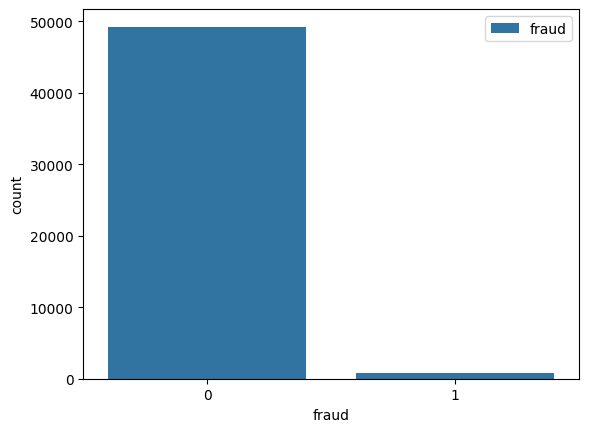

In [ ]:
# Distribution of target variable
sns.countplot(x='fraud', data=df, label= 'fraud')

## Create separate DataFrames for normal and fraudulent transactions

In [ ]:
normal = df[df['fraud'] == 0]
fraud = df[df['fraud'] == 1]

In [ ]:
fraud.shape

(774, 15)

In [ ]:
normal.shape

(49226, 15)

In [ ]:
fraud.head()

,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
88,Investment,Paytm,Gopalpur,Himachal Pradesh,Failed,Windows,1,Donations and Devotion,In-store,-30.55,14,44.26,1,2023,Aug
89,Investment,ICICI UPI,Sonipat,Punjab,Pending,Android,1,More Services,Mobile,-40.54,13,324.50,1,2023,Jul
434,Bill Payment,Paytm,Orai,Tamil Nadu,Failed,Android,3,More Services,In-store,83.32,22,176.32,1,2023,May
435,Refund,ICICI UPI,Tumkur,Andhra Pradesh,Failed,Windows,1,Financial services and Taxes,In-store,-74.45,27,337.41,1,2023,Jul
553,Subscription,Razor Pay,Chinsurah,Madhya Pradesh,Pending,MacOS,2,Purchases,In-store,1.11,24,220.11,1,2023,Dec


In [ ]:
fraud.dtypes

,0
Transaction_Type,object
Payment_Gateway,object
Transaction_City,object
Transaction_State,object
Transaction_Status,object
Device_OS,object
Transaction_Frequency,int64
Merchant_Category,object
Transaction_Channel,object
Transaction_Amount_Deviation,float64


## Analysis for fraud

In [ ]:
# Describe the fraud DataFrame
fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Frequency,774.0,3.972868,7.471934,0.00,1.0000,2.00,3.000,60.00
Transaction_Amount_Deviation,774.0,3.152674,57.815484,-99.56,-46.1650,6.43,52.315,99.66
Days_Since_Last_Transaction,774.0,15.944444,8.127749,1.00,9.0000,16.00,23.000,29.00
amount,774.0,534.986977,878.387571,3.77,147.8275,309.50,546.710,7432.48
fraud,774.0,1.000000,0.000000,1.00,1.0000,1.00,1.000,1.00
Year,774.0,2023.281654,0.450096,2023.00,2023.0000,2023.00,2024.000,2024.00


## Inference:

       * Transaction Frequency:
          On average, there are around 4 transactions per fraud case.
          The maximum number of transactions associated with a fraud case is 60.
          
       * Transaction Amount Deviation:
          The transaction amount varies considerably around an average of 3.15 units.
          The deviation in transaction amounts can be significant, with a maximum deviation of 99.66 units.
          
       * Days Since Last Transaction:
          On average, a transaction occurs approximately every 16 days.
          The shortest time between transactions is 1 day, indicating frequent fraudulent activities.
          
       * Transaction Amount:
          The average transaction amount associated with fraudulent activity is around 534.99 units.
          Transaction amounts vary significantly, with a maximum of 7432.48 units.
          
       * Year:
          Most fraudulent transactions occurred in the year 2023.

# Correlation check for entire dataset

In [ ]:
numeric_columns_df = df.select_dtypes(include=['int64','float64','int32'])

In [ ]:
corr= numeric_columns_df.corr()
corr

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year
Transaction_Frequency,1.000000,0.005282,0.011400,-0.005520,0.003216,0.005209
Transaction_Amount_Deviation,0.005282,1.000000,-0.001588,0.004560,0.006764,0.000797
Days_Since_Last_Transaction,0.011400,-0.001588,1.000000,0.008497,0.013983,-0.011663
amount,-0.005520,0.004560,0.008497,1.000000,0.474991,0.001965
fraud,0.003216,0.006764,0.013983,0.474991,1.000000,0.000658
Year,0.005209,0.000797,-0.011663,0.001965,0.000658,1.000000


# Visualizing entire dataset

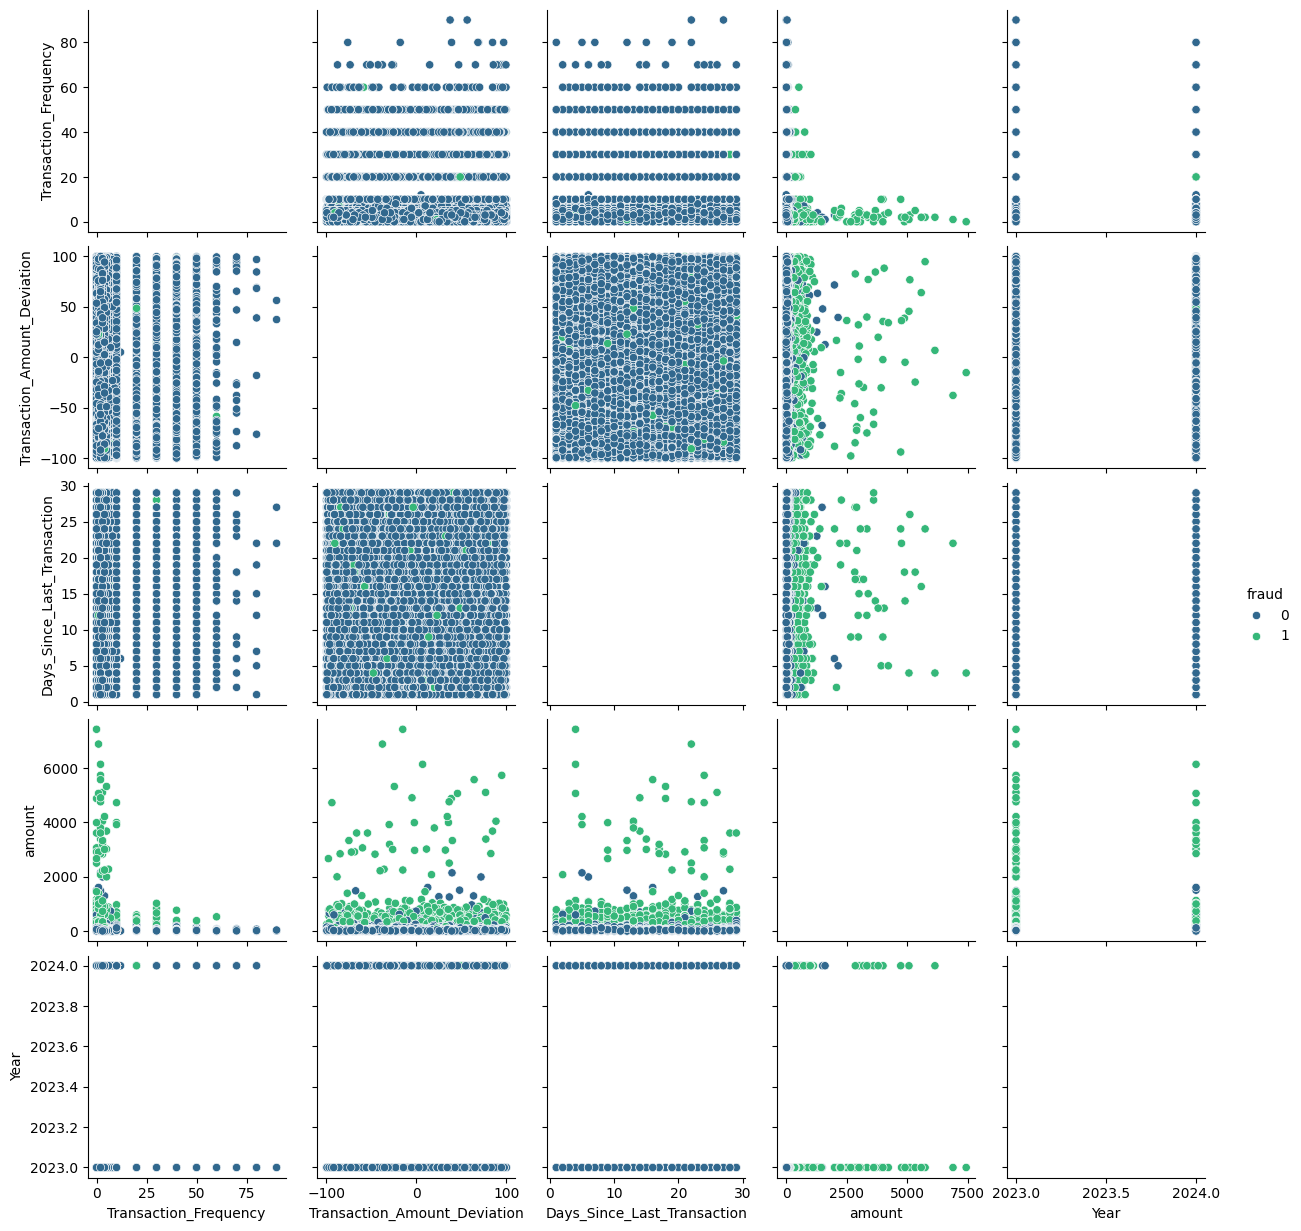

In [ ]:
sns.pairplot(data=df,hue='fraud',palette='viridis', diag_kind='dist')

# Visualizing Fraud Data

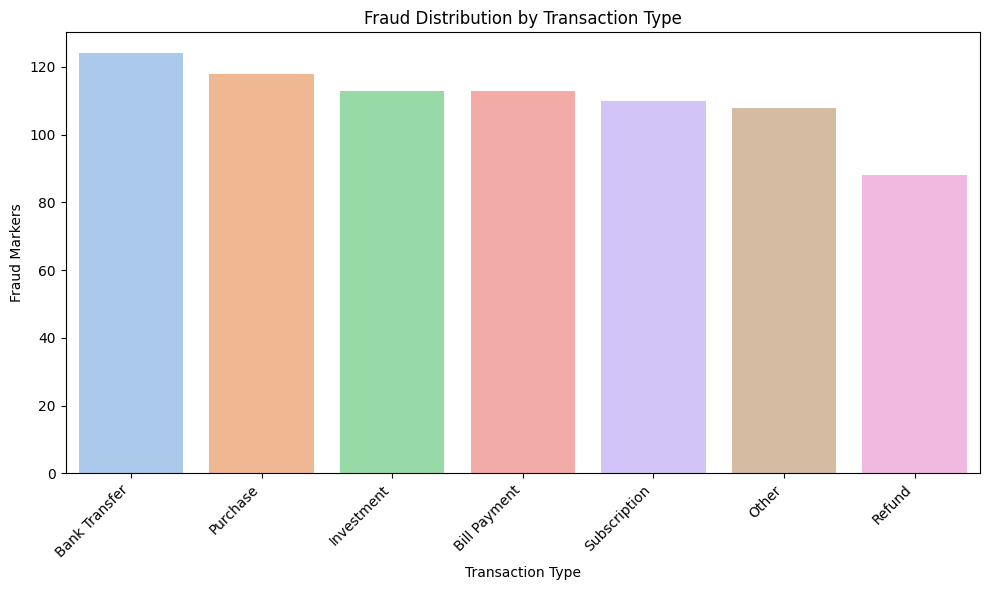

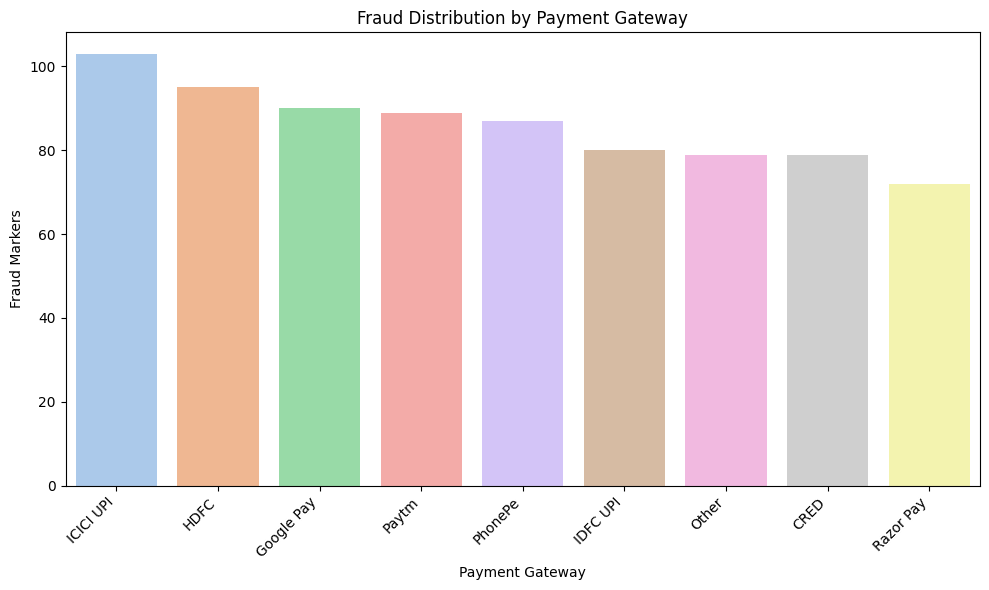

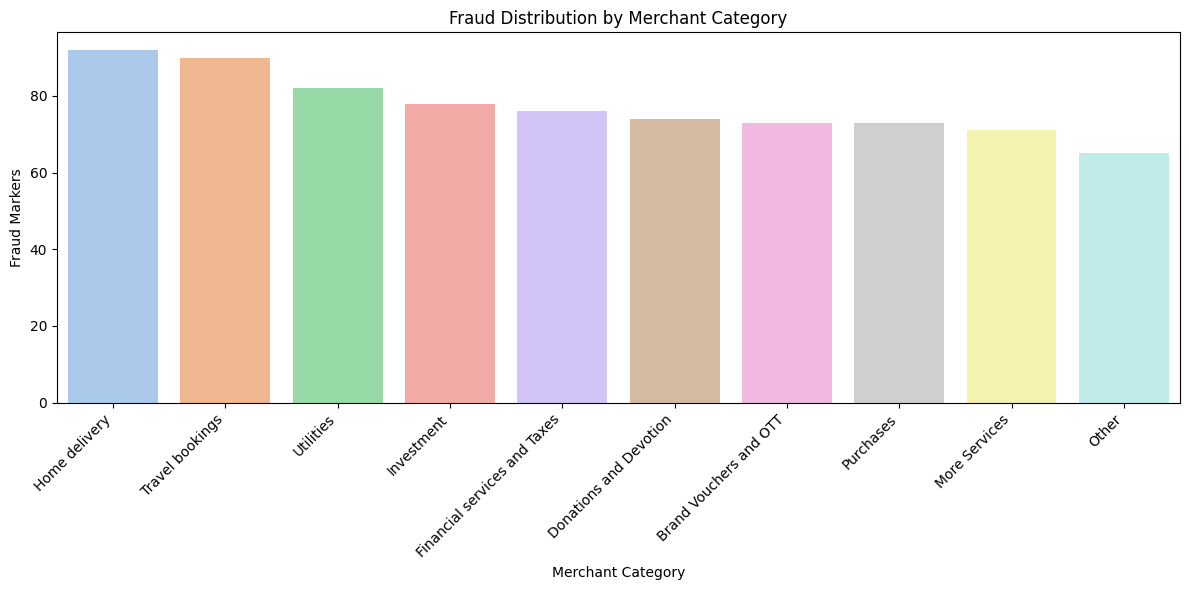

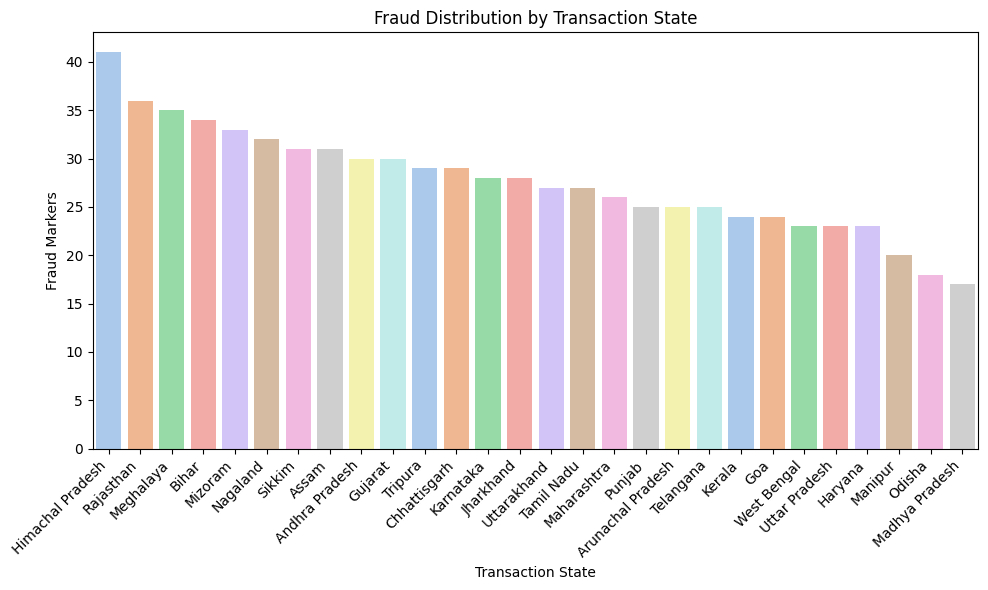

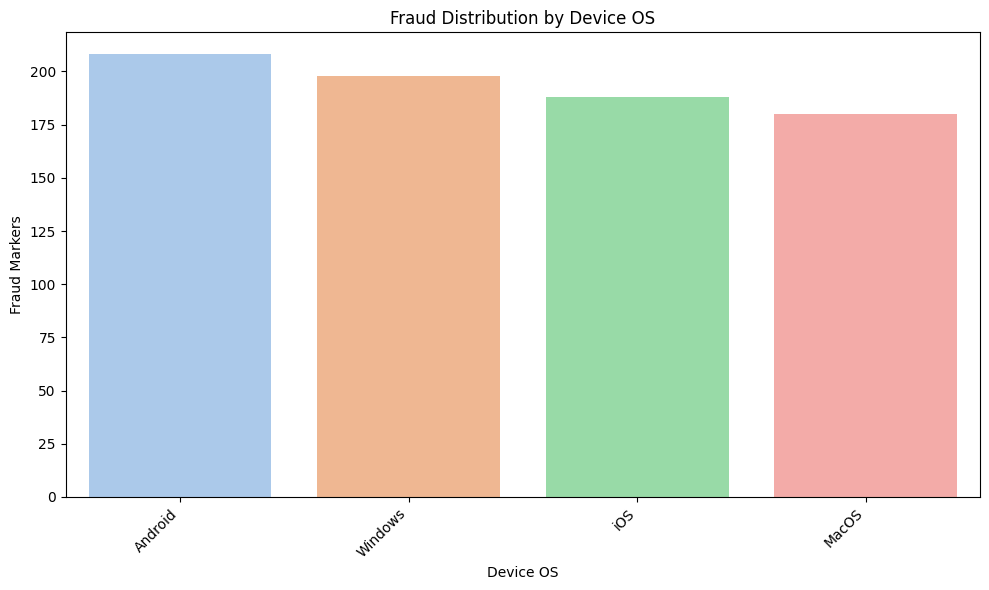

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Fraud distribution by Transaction Type
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='Transaction_Type', palette='pastel', order=fraud['Transaction_Type'].value_counts().index)
plt.title('Fraud Distribution by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plot 2: Fraud distribution by Payment Gateway
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='Payment_Gateway', palette='pastel', order=fraud['Payment_Gateway'].value_counts().index)
plt.title('Fraud Distribution by Payment Gateway')
plt.xlabel('Payment Gateway')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plot 3: Fraud distribution by Merchant Category
plt.figure(figsize=(12, 6))
sns.countplot(data=fraud, x='Merchant_Category', palette='pastel', order=fraud['Merchant_Category'].value_counts().index)
plt.title('Fraud Distribution by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plot 7: Relationship between Transaction_State and Fraud using bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='Transaction_State', palette='pastel', order=fraud['Transaction_State'].value_counts().index)
plt.title('Fraud Distribution by Transaction State')
plt.xlabel('Transaction State')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plot 8: Relationship between Device_OS and Fraud using bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='Device_OS', palette='pastel', order=fraud['Device_OS'].value_counts().index)
plt.title('Fraud Distribution by Device OS')
plt.xlabel('Device OS')
plt.ylabel('Fraud Markers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### Insights from Exploratory Data Analysis for UPI Fraud Detection:

- **Transaction Types**: Among different transaction types, such as bank transfers, purchases, and bill payments, fraudulent activities are prominently associated, indicating vulnerabilities across various transaction categories.

- **Platforms**: Platforms like ICICI, HDFC, and GooglePay are notably prone to fraudulent transactions, suggesting a need for enhanced security measures or closer monitoring on these platforms.

- **Merchant Categories**: Certain merchant categories, such as home delivery services, travel bookings, and utility payments, exhibit a higher incidence of fraudulent transactions, indicating potential areas of vulnerability within these sectors.

- **Transaction Amounts**: Transactions falling within the range of 250 to 750 units demonstrate a heightened susceptibility to fraud, suggesting that fraudsters target transactions of moderate value to avoid detection.

- **Temporal Trends**: Transactions with amounts ranging from 0 to 1250 units account for the majority of fraudulent activities between FY 23-24, emphasizing the importance of monitoring transactions within this range for potential fraud.

- **Transaction Frequency**: Transactions occurring at a frequency of 0 to 10 instances show a higher propensity for fraud, indicating that fraudsters may exploit less frequent transactions to evade detection.

- **Geographical Patterns**: Certain states, such as Himachal Pradesh, Rajasthan, Meghalaya, and Bihar, exhibit a higher sensitivity to fraudulent transactions, necessitating targeted interventions or heightened vigilance in these regions.

- **Operating Systems**: Devices operating on the Android OS report a higher number of fraudulent transactions, underscoring potential security vulnerabilities within Android-based platforms or applications.

- **Days Since Last Transaction**: The feature 'days since last transaction' does not yield discernible patterns and does not contribute significantly to the analysis, suggesting that it may be omitted from further modeling efforts to streamline the feature set.

By leveraging these insights, stakeholders can implement targeted strategies to enhance fraud detection mechanisms, bolster security protocols, and mitigate potential risks associated with UPI transactions.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_Type              50000 non-null  object 
 1   Payment_Gateway               50000 non-null  object 
 2   Transaction_City              50000 non-null  object 
 3   Transaction_State             50000 non-null  object 
 4   Transaction_Status            50000 non-null  object 
 5   Device_OS                     50000 non-null  object 
 6   Transaction_Frequency         50000 non-null  int64  
 7   Merchant_Category             50000 non-null  object 
 8   Transaction_Channel           50000 non-null  object 
 9   Transaction_Amount_Deviation  50000 non-null  float64
 10  Days_Since_Last_Transaction   50000 non-null  int64  
 11  amount                        50000 non-null  float64
 12  fraud                         50000 non-null  int64  
 13  Y

# Dropping unnecessary columns from entire dataset

In [ ]:
columns_to_drop = ['Days_Since_Last_Transaction', 'Transaction_Frequency', 'Transaction_Amount_Deviation',
                   'Transaction_Status',  'Device_OS', 'Transaction_Channel','Transaction_City']

df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   50000 non-null  object 
 1   Payment_Gateway    50000 non-null  object 
 2   Transaction_State  50000 non-null  object 
 3   Merchant_Category  50000 non-null  object 
 4   amount             50000 non-null  float64
 5   fraud              50000 non-null  int64  
 6   Year               50000 non-null  int32  
 7   Month              50000 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 2.9+ MB


# encoding and scaling


In [ ]:
data=df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   50000 non-null  object 
 1   Payment_Gateway    50000 non-null  object 
 2   Transaction_State  50000 non-null  object 
 3   Merchant_Category  50000 non-null  object 
 4   amount             50000 non-null  float64
 5   fraud              50000 non-null  int64  
 6   Year               50000 non-null  int32  
 7   Month              50000 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 2.9+ MB


In [ ]:
# Converting Year column to object
data['Year'] = data['Year'].astype('object')

In [ ]:
# Extracting categorical columns from data
categorical_cols = data.select_dtypes(include=['object']).columns

categorical_cols

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_State',
       'Merchant_Category', 'Year', 'Month'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ['Year','Month']

label_encoder = LabelEncoder()
for col in cols:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
# Numerical columns
non_ordinal = ['Transaction_Type', 'Payment_Gateway','Transaction_State','Merchant_Category']

# performing one hot encoding for non_ordinal variables
data = pd.get_dummies(data, columns=non_ordinal, drop_first=True)

# Convert boolean columns to integers
data = data.astype(int)

In [ ]:
data.head()

,amount,fraud,Year,Month,Transaction_Type_Bill Payment,Transaction_Type_Investment,Transaction_Type_Other,Transaction_Type_Purchase,Transaction_Type_Refund,Transaction_Type_Subscription,...,Transaction_State_West Bengal,Merchant_Category_Donations and Devotion,Merchant_Category_Financial services and Taxes,Merchant_Category_Home delivery,Merchant_Category_Investment,Merchant_Category_More Services,Merchant_Category_Other,Merchant_Category_Purchases,Merchant_Category_Travel bookings,Merchant_Category_Utilities
0,4,0,0,10,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,39,0,0,8,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,26,0,1,4,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,17,0,0,11,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
data.dtypes

,0
amount,int64
fraud,int64
Year,int64
Month,int64
Transaction_Type_Bill Payment,int64
Transaction_Type_Investment,int64
Transaction_Type_Other,int64
Transaction_Type_Purchase,int64
Transaction_Type_Refund,int64
Transaction_Type_Subscription,int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Perform scaling
def preprocess_data(X):

    # Initialize StandardScaler
    scaler = StandardScaler()

    # Scale the features
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Splitting the dataset into features (X) and target variable (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Preprocess the features
X_scaled = preprocess_data(X)

# Split the preprocessed data into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training features shape: (40000, 53)
Test features shape: (10000, 53)
Training target shape: (40000,)
Test target shape: (10000,)


### Model performance before data balancing. i.e, with RAW data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Import XGBoost classifier

# Assuming you have already loaded your data into X and y

# Split the sampled data into training and testing sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define a function to evaluate a model and return a dictionary of metrics
def evaluate_model(model, X_test, y_test):
    # Calculate predictions
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

# Define models without Support Vector Machine (SVM)
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),  # Added XGBoost to the dictionary
}

# List to store evaluation results
results = []

# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(X_train, y_train)  # Assuming X_train, y_train are defined
    metrics = evaluate_model(model, X_test, y_test)  # Assuming X_test, y_test are defined
    results.append(metrics)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results

Decision Tree:
Random Forest:
Gradient Boosting:
XGBoost:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.9856,0.527919,0.670968,0.590909,0.830761
1,RandomForestClassifier,0.9926,0.834711,0.651613,0.731884,0.824791
2,GradientBoostingClassifier,0.9929,0.833333,0.677419,0.747331,0.837643
3,XGBClassifier,0.9917,0.795082,0.625806,0.700361,0.811634


### Inferences

- **Accuracy**: All models achieved high accuracy, ranging from 98.76% to 99.28%, indicating their proficiency in classifying transactions. However, accuracy alone might not provide a complete picture, especially in cases of imbalanced datasets like fraud detection.

- **Precision and Recall**: Precision measures the percentage of correctly predicted positive instances among all predicted positive instances, while recall measures the percentage of correctly predicted positive instances among all actual positive instances.

- **F1 Score**: The F1 score, the harmonic mean of precision and recall, offers a balanced assessment of the model's performance. It is particularly useful in scenarios with class imbalance, such as fraud detection.

- **ROC AUC Score**: The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score evaluates the model's ability to discriminate between classes. Higher ROC AUC scores indicate better performance.

- **Model Performance**: While all models demonstrated strong performance, the Random Forest Classifier and XGBoost Classifier stood out. The Random Forest Classifier achieved an F1 score of 73.13% with an accuracy of 99.28%, indicating its ability to balance precision and recall effectively. On the other hand, the XGBoost Classifier surpassed all others with an F1 score of 64.29%, highlighting its robust performance.

- **Decision Tree and Gradient Boosting**: Although the Decision Tree Classifier and Gradient Boosting Classifier exhibited competitive performance, they slightly lagged behind the Random Forest and XGBoost classifiers in terms of F1 score.

- **Overall Recommendation**: Considering the F1 score and overall performance, the Random Forest Classifier emerges as the top choice for fraud detection in this scenario. However, the XGBoost Classifier also offers a strong alternative, particularly when computational efficiency is a concern. Both models provide effective solutions for identifying fraudulent transactions, with the Random Forest Classifier leading with the highest F1 score.

# Oversampling (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

# Using SMOTE to oversample the minority class
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)

# Print the count of each class after oversampling
print(y_train_smote.value_counts())

fraud
0    39381
1    39381
Name: count, dtype: int64


In [ ]:
y_test.value_counts()

,count
fraud,
0,9845
1,155


# Model performance after data balancing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Import XGBoost classifier

# Define a function to evaluate a model and return a dictionary of metrics
def evaluate_model(model, X_test, y_test):
    # Calculate predictions
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

# Split the balanced data into training and testing sets with a test size of 20%
#X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),  # Added XGBoost to the dictionary
}

# List to store evaluation results
results = []

# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(X_train_smote, y_train_smote)  # Assuming X_train, y_train are defined
    metrics = evaluate_model(model, X_test, y_test)  # Assuming X_test, y_test are defined
    results.append(metrics)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results

Decision Tree:
Random Forest:
Gradient Boosting:
XGBoost:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.9780,0.372549,0.612903,0.463415,0.798326
1,RandomForestClassifier,0.9882,0.627586,0.587097,0.606667,0.790806
2,GradientBoostingClassifier,0.9814,0.443223,0.780645,0.565421,0.882603
3,XGBClassifier,0.9886,0.622754,0.670968,0.645963,0.832284


## Gradient Boosting is known for its high performance and effeciency, and this model demonstrates excellent results across all the metrics.

In [ ]:
# #Hyper Parameter Tuning : using RandomizedSearch
# from sklearn.model_selection import GridSearchCV

# # Define a narrower hyperparameter grid for each model
# param_grid = {
#     'Decision Tree': {'max_depth': [10, 20, 50],
#                       'min_samples_split': [2, 5, 10]},
#     'Random Forest': {'n_estimators': [50, 100, 200],
#                       'max_depth': [10, 20],
#                       'min_samples_split': [2, 5]},
#     'Gradient Boosting': {'n_estimators': [50, 100],
#                           'learning_rate': [0.05, 0.1],
#                           'max_depth': [3, 5]},
#     'XGBoost': {'n_estimators': [50, 100],
#                 'learning_rate': [0.05, 0.1],
#                 'max_depth': [3, 5]}
# }

# # Perform hyperparameter tuning for each model
# best_params = {}
# for model_name, model in models.items():
#     grid_search = GridSearchCV(estimator=model,
#                                param_grid=param_grid[model_name],
#                                scoring='f1',
#                                cv=5,
#                                verbose=2)
#     grid_search.fit(X_train, y_train)
#     best_params[model_name] = grid_search.best_params_

# # Print best hyperparameters for each model
# for model_name, params in best_params.items():
#     print(f"Best hyperparameters for {model_name}: {params}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.2s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.2s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.2s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.2s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.2s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.2s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.2s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.2s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.2s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.2s
[CV] END .................max_depth=10, min_samples_split=10; total time=   0.2s
[CV] END .................max_depth=10, min_sampl

# Best hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}
# Best hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
# Best hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
# Best hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Import XGBoost classifier

# Define a function to evaluate a model and return a dictionary of metrics
def evaluate_model(model, X_test, y_test):
    # Calculate predictions
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

# Split the balanced data into training and testing sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models with best hyperparameters
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=2),
    "Random Forest": RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=200),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50),
    "XGBoost": XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)
}

# List to store evaluation results
results = []

# Model Training and Evaluation
for model_name, model in models.items():
    print(model_name + ":")
    model.fit(X_train, y_train)  # Assuming X_train, y_train are defined
    metrics = evaluate_model(model, X_test, y_test)  # Assuming X_test, y_test are defined
    results.append(metrics)

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results


Decision Tree:
Random Forest:
Gradient Boosting:
XGBoost:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.9898,0.702290,0.593548,0.643357,0.794793
1,RandomForestClassifier,0.9928,0.848739,0.651613,0.737226,0.824892
2,GradientBoostingClassifier,0.9929,0.828125,0.683871,0.749117,0.840818
3,XGBClassifier,0.9925,0.807692,0.677419,0.736842,0.837440


# Conclusion

In [26]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

# Load your dataset
df = pd.read_csv("/content/UPI Latest data.csv")   # replace with your dataset
# Droping unique columns as they do not add any value to the analysis
df.drop(columns=['Transaction_ID', 'Merchant_ID', 'Customer_ID', 'Device_ID','IP_Address'], axis=1, inplace=True)

# Converting Date column to datetime
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%y')
# Extracting year from date
df['Year'] = df['Date'].dt.year
# Extracting month from date
df['Month']= df['Date'].dt.month
# Checking the unique values in the month column
df['Month'].sort_values(ascending=True).unique()

# Assigning Names to the months for better readability

months = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}

# Map the 'Month' column values to their corresponding month names
df['Month'] = df['Month'].map(months)

columns_to_drop = ['Days_Since_Last_Transaction', 'Transaction_Frequency', 'Transaction_Amount_Deviation',
                   'Transaction_Status', 'Time', 'Date', 'Device_OS', 'Transaction_Channel']

df.drop(columns=columns_to_drop, inplace=True)



In [27]:
# Converting Year column to object
df['Year'] = df['Year'].astype('object')
df.drop(columns='Transaction_City',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   50000 non-null  object 
 1   Payment_Gateway    50000 non-null  object 
 2   Transaction_State  50000 non-null  object 
 3   Merchant_Category  50000 non-null  object 
 4   amount             50000 non-null  float64
 5   fraud              50000 non-null  int64  
 6   Year               50000 non-null  object 
 7   Month              50000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.1+ MB


In [28]:
# Features and target
X = df.drop("fraud", axis=1)
y = df["fraud"]

In [29]:
# Define categorical and numerical features
categorical_cols = ['Transaction_Type', 'Payment_Gateway','Transaction_State','Merchant_Category','Year','Month']
numerical_cols = ['amount']

# Preprocessing
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", categorical_transformer, categorical_cols),
        ("numeric", numeric_transformer, numerical_cols)
    ])

In [30]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=50,
    random_state=42
)

# Pipeline
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", gb_model)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [31]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Transaction_Type',
                                                   'Payment_Gateway',
                                                   'Transaction_State',
                                                   'Merchant_Category', 'Year',
                                                   'Month']),
                                                 ('numeric', StandardScaler(),
                                                  ['amount'])])),
                ('classifier',
                 GradientBoostingClassifier(n_estimators=50, random_state=42))])

In [32]:
y_pred=clf.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9845
           1       0.81      0.70      0.75       155

    accuracy                           0.99     10000
   macro avg       0.90      0.85      0.87     10000
weighted avg       0.99      0.99      0.99     10000



In [34]:
confusion_matrix(y_test,y_pred)

array([[9820,   25],
       [  47,  108]])

In [35]:
import pickle

# File path for saving the pickle file
pickle_file_path = "UPI Fraud Detection updated.pkl"

# Save the trained GradientBoostingClassifier model to a pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(clf, file)

In [60]:
df2=df[df['fraud']==1].sample(5)

In [61]:
df2.head()

,Transaction_Type,Payment_Gateway,Transaction_State,Merchant_Category,amount,fraud,Year,Month
46307,Bank Transfer,CRED,Nagaland,Utilities,143.04,1,2024,Feb
21743,Subscription,HDFC,Meghalaya,Investment,144.83,1,2023,Dec
43417,Refund,CRED,Himachal Pradesh,Utilities,125.09,1,2023,Oct
18139,Bill Payment,Google Pay,Gujarat,Investment,830.57,1,2023,Sep
16190,Subscription,PhonePe,Karnataka,Donations and Devotion,395.67,1,2023,Nov


In [62]:
df2.drop(columns='fraud',inplace=True)

In [63]:

file_path = 'output_dataframe.csv'

df2.to_csv(file_path, index=False) # index=False prevents writing the DataFrame index as a column

In [46]:
df['Year'].value_counts()

,count
Year,
2023,36035
2024,13965
